Лабораторная 2

Информация об экономике стран

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv(".//static//scv//Economic Data - 9 Countries (1980-2020).csv")
print(df.columns)

Index(['stock index', 'country', 'year', 'index price', 'log_indexprice',
       'inflationrate', 'oil prices', 'exchange_rate', 'gdppercent',
       'percapitaincome', 'unemploymentrate', 'manufacturingoutput',
       'tradebalance', 'USTreasury'],
      dtype='object')


Столбцы на русском:
'stock index' - индекс акций
'country' - страна
'year'- год
'index price' - индекс стоимости
'log_indexprice' - индексная цена журнала
'inflationrate' - ставка инфляции
'oil prices' - цена на нефть
'exchange_rate' - ставка обмена
'gdppercent' - процент ВВП
'percapitaincome' - доход на душу населения
'unemploymentrate' - уровень безработицы
'manufacturingoutput' - объем производства
'tradebalance' - торговый баланс
'USTreasury' - UST казначейство

In [112]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    float64
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
dtypes: float64(12), object(2)
memory usage: 40.5+ KB


stock index                   country    year  index price  log_indexprice  \
0      NASDAQ  United States of America  1980.0       168.61            2.23   
1      NASDAQ  United States of America  1981.0       203.15            2.31   
2      NASDAQ  United States of America  1982.0       188.98            2.28   
3      NASDAQ  United States of America  1983.0       285.43            2.46   
4      NASDAQ  United States of America  1984.0       248.89            2.40   

   inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0           0.14       21.59            1.0        0.09          12575.0   
1           0.10       31.77            1.0        0.12          13976.0   
2           0.06       28.52            1.0        0.04          14434.0   
3           0.03       26.19            1.0        0.09          15544.0   
4           0.04       25.88            1.0        0.11          17121.0   

   unemploymentrate  manufacturingoutput  tradebalance  USTreasury  
0              0.07                  NaN        -13.06        0.11  
1              0.08                  NaN        -12.52        0.14  
2              0.10                  NaN        -19.97        0.13  
3              0.10                  NaN        -51.64        0.11  
4              0.08                  NaN       -102.73        0.12

Объект наблюдения - экономика
Атрибуты - содержит набор информации об обучении, такие как:
Фондовый рынок, ВВП, страна, год, стоимость топлива, уровень инфлции,уровень безработицы и так далее

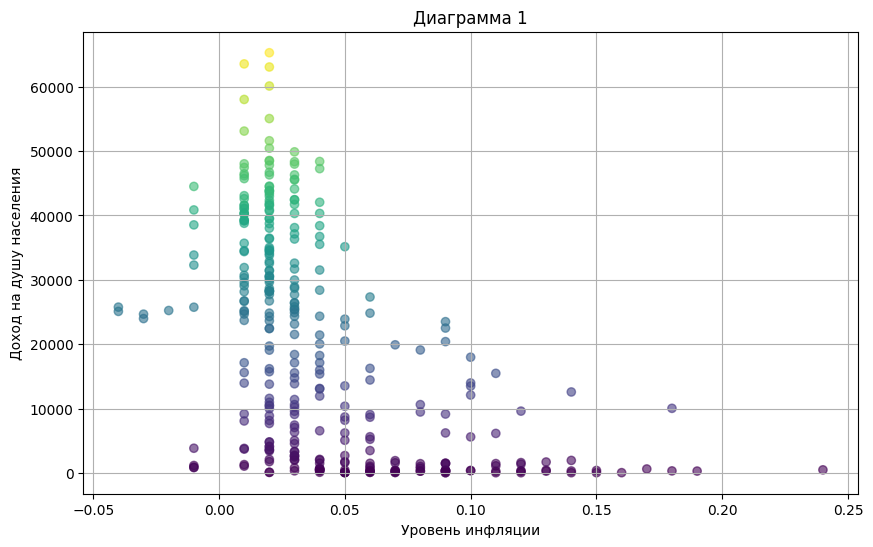

In [113]:
plt.figure(figsize=(10, 6))

plt.scatter(df['inflationrate'], df['percapitaincome'], c=df['percapitaincome'], alpha=0.6)

plt.title("Диаграмма 1")
plt.ylabel("Доход на душу населения")
plt.xlabel("Уровень инфляции")
plt.grid(visible='true')

plt.show()

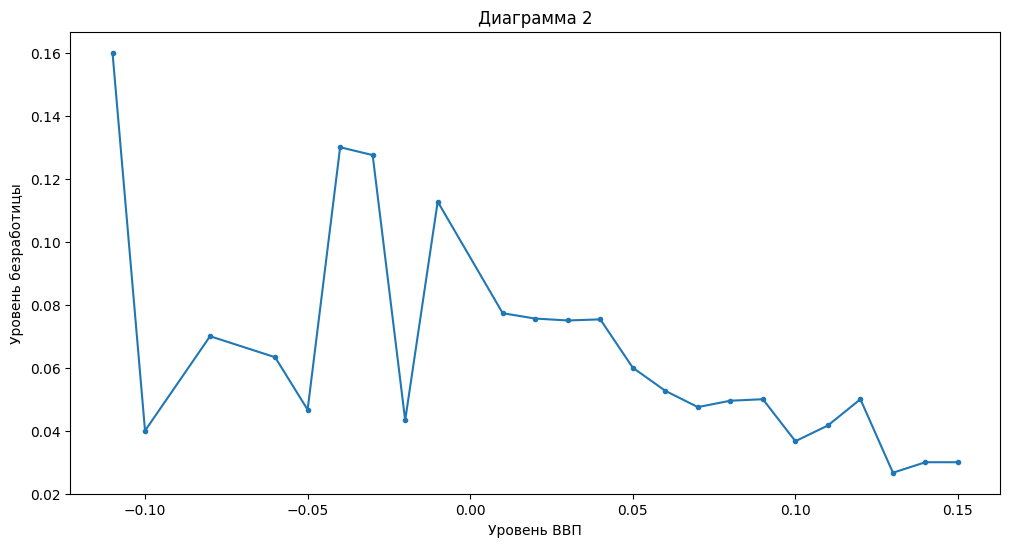

In [114]:
df_dependence = df.groupby('gdppercent')['unemploymentrate'].mean().reset_index()

plt.figure(figsize=(12, 6))

plt.plot(df_dependence['gdppercent'], df_dependence['unemploymentrate'], marker='.')

plt.title("Диаграмма 2")
plt.xlabel("Уровень ВВП")
plt.ylabel("Уровень безработицы")


plt.show()

Присутствует связь между атрибутами, уровень инфляции влияет и зависит от многих атрибутов.
Для примера на графике приведена связь между инфляцией и доходом на душу населения. На втором графике показана связь уровня ВВП и безработицы
Примеры бизнес целей

    1.Прогнозирование уровня инфляции на основе уровня ВВП.
    2.Наблюдение за изменениями уровня безработицы с уровнем ВВП.
    
Эффект для бизнеса: влияние на инвестиции индекса акций и цен на нефть, исследование влияния фондового индекса на инвестиции, исследования инфляции и покупательской способности.
Цели технического проекта

Для первой цели:

Вход: Доход на душу населения
Целевой признак: Уровень инфляции.

Для второй цели:

Вход: Уровень безработицы
Целевой признак: Уровень ВВП

Проверка на выбросы

In [115]:
null_values = df.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)


Пропущенные значения по столбцам:
stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput    91
tradebalance            4
USTreasury              0
dtype: int64

Статистический обзор данных:
              year   index price  log_indexprice  inflationrate  oil prices  \
count   369.000000    317.000000      369.000000     326.000000  369.000000   
mean   2000.000000   7898.648297        3.610542       0.041748   39.743171   
std      11.848225   7811.336862        0.482481       0.039579   25.452654   
min    1980.000000    168.610000        2.230000      -0.040000   11.350000   
25%    1990.000000   2407.100000        3.320000       0.020000   19.410000   
50%    2000.000000   5160.100000        3.600000       0.030000   28.520000   
75%   

На основе данных выше можно выделить большое количество столбцов с пропущенными значениями
Также проверим данные на выбросы и дубликаты:

In [116]:
for column in df.select_dtypes(include=[np.number]).columns:
    skewness = df[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")

duplicates = df.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")



Коэффициент асимметрии для столбца 'year': 0.0

Коэффициент асимметрии для столбца 'index price': 1.7605604508668822

Коэффициент асимметрии для столбца 'log_indexprice': -0.23716751168770417

Коэффициент асимметрии для столбца 'inflationrate': 1.5616085380027898

Коэффициент асимметрии для столбца 'oil prices': 0.9915046764713877

Коэффициент асимметрии для столбца 'exchange_rate': 2.1575952097650455

Коэффициент асимметрии для столбца 'gdppercent': -0.038272329611460466

Коэффициент асимметрии для столбца 'percapitaincome': 0.3051430219264069

Коэффициент асимметрии для столбца 'unemploymentrate': 1.8092896369785585

Коэффициент асимметрии для столбца 'manufacturingoutput': 4.195480293406057

Коэффициент асимметрии для столбца 'tradebalance': -2.266183907194849

Коэффициент асимметрии для столбца 'USTreasury': 0.6687596580836408

Количество дубликатов: 0


На основе данных выше можно сказать, что для столбца объем производства присутствует выброс.
Удаляем все найденные пустые значения.

In [117]:
def drop_missing_values(dataframe, name):
    before_shape = dataframe.shape 
    cleaned_dataframe = dataframe.dropna()  
    after_shape = cleaned_dataframe.shape 
    print(f"В наборе данных '{name}' было удалено {before_shape[0] - after_shape[0]} строк с пустыми значениями.")
    return cleaned_dataframe

cleaned_df = drop_missing_values(df, "Economic")

В наборе данных 'Economic' было удалено 150 строк с пустыми значениями.


Очистка данных от шумов:

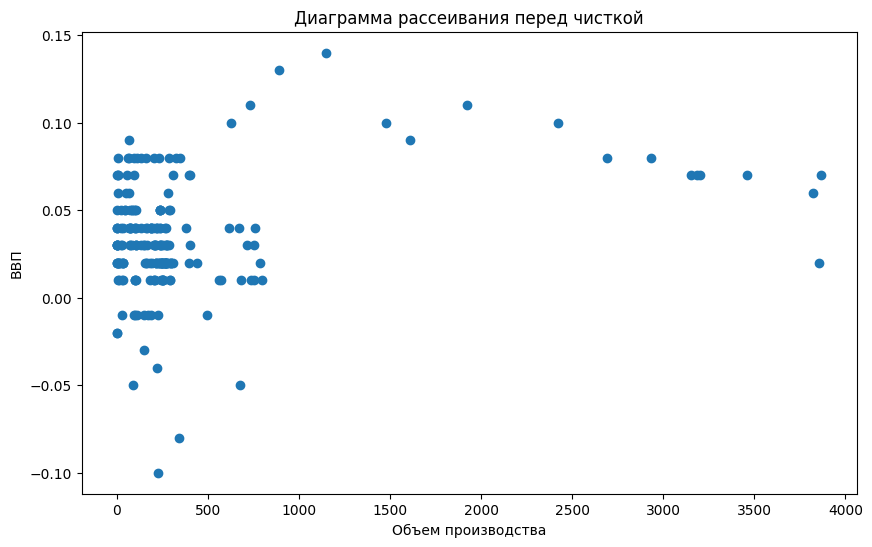

Выбросы в датасете:
    stock index  country    year  index price  log_indexprice  inflationrate  \
229      SZCOMP    China  2004.0      1467.57            3.17           0.04   
230      SZCOMP    China  2005.0      1144.54            3.06           0.02   
231      SZCOMP    China  2006.0      1687.14            3.23           0.02   
232      SZCOMP    China  2007.0      4329.44            3.64           0.05   
233      SZCOMP    China  2008.0      2912.90            3.46           0.06   
234      SZCOMP    China  2009.0      2737.01            3.44          -0.01   
235      SZCOMP    China  2010.0      2795.88            3.45           0.03   
236      SZCOMP    China  2011.0      2639.19            3.42           0.06   
237      SZCOMP    China  2012.0      2211.11            3.34           0.03   
238      SZCOMP    China  2013.0      2182.52            3.34           0.03   
239      SZCOMP    China  2014.0      2279.75            3.36           0.02   
240      SZCOMP    C

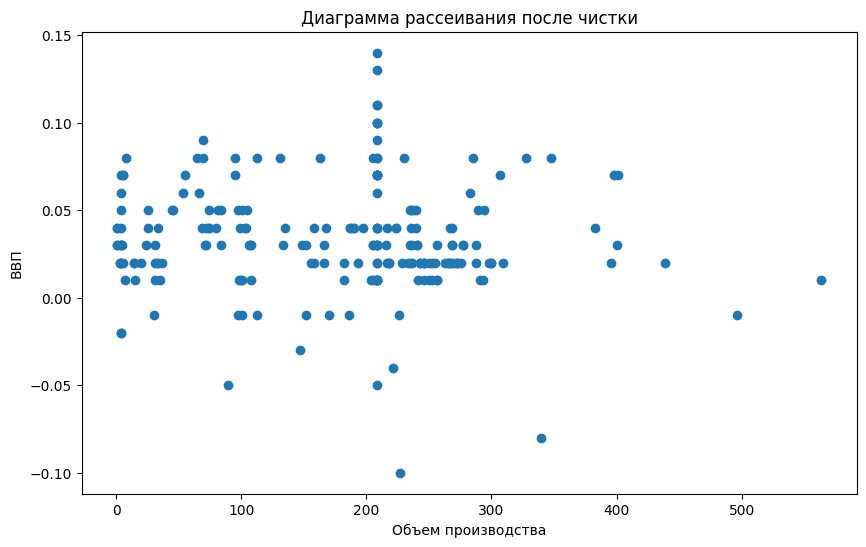

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['manufacturingoutput'], cleaned_df['gdppercent'])
plt.xlabel('Объем производства')
plt.ylabel('ВВП')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = cleaned_df["manufacturingoutput"].quantile(0.25)
Q3 = cleaned_df["manufacturingoutput"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (cleaned_df["manufacturingoutput"] < lower_bound) | (cleaned_df["manufacturingoutput"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(cleaned_df[outliers])

# Заменяем выбросы на медианные значения
median_score = cleaned_df["manufacturingoutput"].median()
cleaned_df.loc[outliers, "manufacturingoutput"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_df['manufacturingoutput'], cleaned_df['gdppercent'])
plt.xlabel('Объем производства')
plt.ylabel('ВВП')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [119]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 131
Размер контрольной выборки: 44
Размер тестовой выборки: 44


Видим недостаток баланса

In [120]:
def check_balance(df, name):
    counts = df['gdppercent'].value_counts()
    print(f"Распределение ВВП в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение ВВП в обучающей выборке:
gdppercent
 0.02    30
 0.04    25
 0.03    21
 0.01    13
 0.07     8
 0.08     8
 0.05     7
-0.01     5
 0.11     2
 0.09     2
-0.02     2
 0.10     2
-0.03     1
 0.14     1
-0.10     1
 0.06     1
-0.05     1
-0.04     1
Name: count, dtype: int64

Распределение ВВП в контрольной выборке:
gdppercent
 0.02    9
 0.03    7
 0.01    6
 0.07    4
 0.04    4
 0.05    4
 0.08    3
 0.06    3
-0.01    2
 0.10    1
-0.08    1
Name: count, dtype: int64

Распределение ВВП в тестовой выборке:
gdppercent
 0.02    12
 0.03     8
 0.01     7
 0.05     5
 0.04     3
 0.08     3
-0.01     2
-0.05     1
 0.06     1
 0.13     1
 0.07     1
Name: count, dtype: int64



также используем oversampling и undersampling

In [121]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def binning(target, bins):
    return pd.qcut(target, q=bins, labels=False)

train_df['gdppercent_binned'] = binning(train_df['gdppercent'], bins=2)
val_df['gdppercent_binned'] = binning(val_df['gdppercent'], bins=2)
test_df['gdppercent_binned'] = binning(test_df['gdppercent'], bins=2)

def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'gdppercent_binned')
val_df_oversampled = oversample(val_df, 'gdppercent_binned')
test_df_oversampled = oversample(test_df, 'gdppercent_binned')

train_df_undersampled = undersample(train_df, 'gdppercent_binned')
val_df_undersampled = undersample(val_df, 'gdppercent_binned')
test_df_undersampled = undersample(test_df, 'gdppercent_binned')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение ВВП в обучающей выборке:
gdppercent
 0.04    36
 0.02    30
 0.03    21
 0.01    13
 0.07    10
 0.08    10
 0.05     7
-0.01     5
 0.09     4
 0.11     3
 0.14     2
 0.10     2
-0.02     2
-0.03     1
-0.10     1
 0.06     1
-0.05     1
-0.04     1
Name: count, dtype: int64

Распределение ВВП в контрольной выборке:
gdppercent
 0.02    9
 0.07    7
 0.03    7
 0.01    6
 0.05    5
 0.06    5
 0.04    4
 0.08    3
-0.01    2
 0.10    1
-0.08    1
Name: count, dtype: int64

Распределение ВВП в тестовой выборке:
gdppercent
 0.02    12
 0.03     8
 0.01     7
 0.05     5
 0.04     3
 0.08     3
-0.01     2
-0.05     1
 0.06     1
 0.13     1
 0.07     1
Name: count, dtype: int64

Андерсэмплинг:
Распределение ВВП в обучающей выборке:
gdppercent
 0.02    25
 0.04    25
 0.03    17
 0.07     8
 0.08     8
 0.01     7
 0.05     7
-0.01     3
 0.11     2
 0.09     2
 0.10     2
-0.04     1
-0.10     1
-0.02     1
-0.03     1
 0.14     1
 0.06     1
Name: count, dty

https://www.kaggle.com/datasets/surajjha101/stores-area-and-sales-data - данный датасет содержит информацию о магазинах

In [122]:
df_stores = pd.read_csv(".//static//scv//Stores.csv")
print(df_stores.columns)

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')


Столбцы на русском:
Store ID - Айди магазина
Store_Area - Доступное пространство магазина
Items_Available - Доступные предметы
Daily_Customer_Count - Ежедневное количество клиентов
Stores_Sales - Продажи в магазинах

In [123]:
df_stores.info()
df_stores.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
0          1        1659             1961                   530        66490
1          2        1461             1752                   210        39820
2          3        1340             1609                   720        54010
3          4        1451             1748                   620        53730
4          5        1770             2111                   450        46620

Объект наблюдения - Розничная торговля
Атрибуты - содержит набор информации о магазин, такие как:
Айди, размер, количество доступных предметов, количество покупателей и выручка

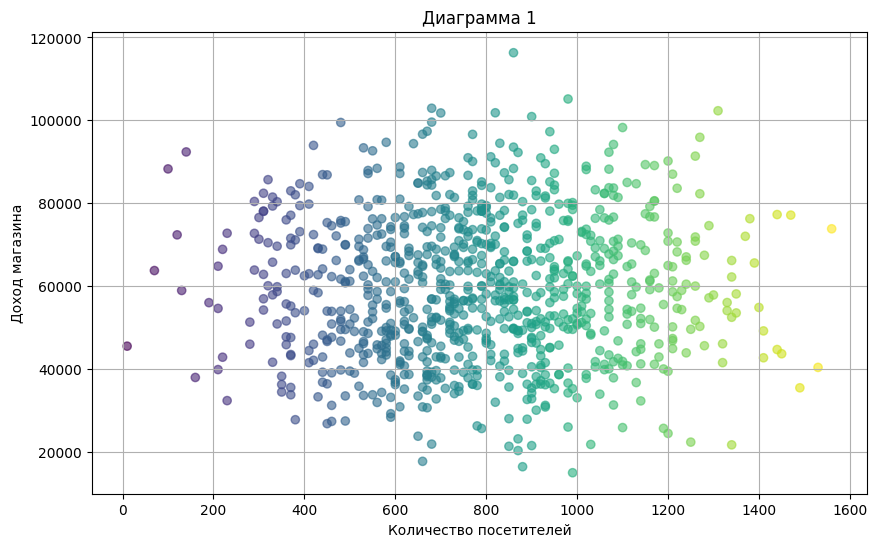

In [124]:
plt.figure(figsize=(10, 6))

plt.scatter(df_stores['Daily_Customer_Count'], df_stores['Store_Sales'], c=df_stores['Daily_Customer_Count'], alpha=0.6)

plt.title("Диаграмма 1")
plt.ylabel("Доход магазина")
plt.xlabel("Количество посетителей")
plt.grid(visible='true')

plt.show()

Присутствует связь между атрибутами, прибыль магазина зависит от количества товаров и количества покупателей. Для примера на графике приведена связь между прибылью и количеством покупателей. 
Примеры бизнес целей

    1.Прогнозирование уровня продаж на основе количества покупателей.
    2.Улучшение маркетинговых стратегий.
    
Эффект для бизнеса: увеличение объема продаж и снижение затрат на хранение непродаваемых товаров, увеличение клиентской базы и повышение лояльности клиентов.
Цели технического проекта

Для первой цели:

Вход: площадь магазина
Целевой признак: сумма продаж.

Для второй цели:

Вход: количество клиентов за день
Целевой признак: сумма продаж

Проверка на выбросы

In [125]:
null_values = df_stores.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df_stores.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)


Пропущенные значения по столбцам:
Store ID                0
Store_Area              0
Items_Available         0
Daily_Customer_Count    0
Store_Sales             0
dtype: int64

Статистический обзор данных:
        Store ID    Store_Area  Items_Available  Daily_Customer_Count  \
count  896.000000   896.000000       896.000000            896.000000   
mean   448.500000  1485.409598      1782.035714            786.350446   
std    258.797218   250.237011       299.872053            265.389281   
min      1.000000   775.000000       932.000000             10.000000   
25%    224.750000  1316.750000      1575.500000            600.000000   
50%    448.500000  1477.000000      1773.500000            780.000000   
75%    672.250000  1653.500000      1982.750000            970.000000   
max    896.000000  2229.000000      2667.000000           1560.000000   

         Store_Sales  
count     896.000000  
mean    59351.305804  
std     17190.741895  
min     14920.000000  
25%     46530.000000

In [126]:
for column in df_stores.select_dtypes(include=[np.number]).columns:
    skewness = df_stores[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")

duplicates = df_stores.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")


Коэффициент асимметрии для столбца 'Store ID ': 0.0

Коэффициент асимметрии для столбца 'Store_Area': 0.030366862979232103

Коэффициент асимметрии для столбца 'Items_Available': 0.03443939172681748

Коэффициент асимметрии для столбца 'Daily_Customer_Count': 0.07463278790524851

Коэффициент асимметрии для столбца 'Store_Sales': 0.14879364291055253

Количество дубликатов: 0


На основе данных выше можно сказать, что пустых значений и дубликатов нет, выбросы минимальны
Очистиим данные от шумов

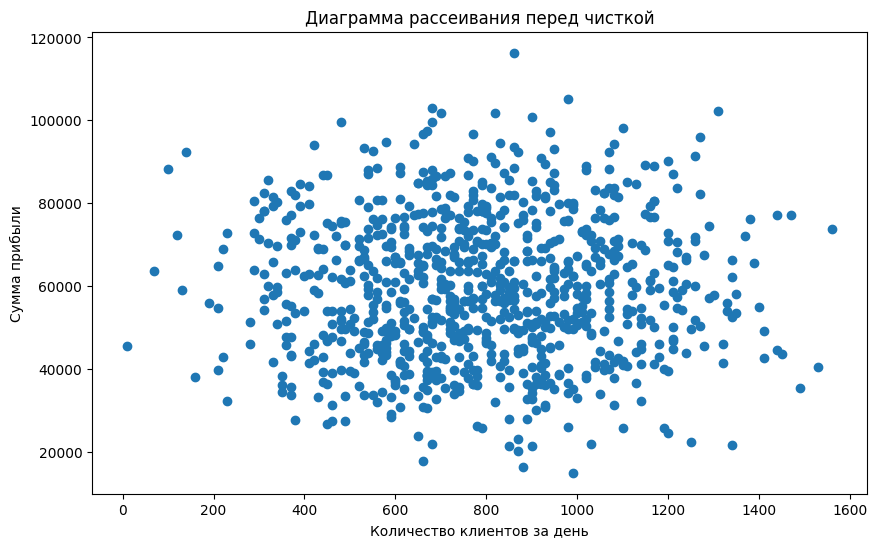

Выбросы в датасете:
     Store ID   Store_Area  Items_Available  Daily_Customer_Count  Store_Sales
39          40        1270             1516                    10        45480
349        350        1886             2228                  1530        40350
848        849         919             1099                  1560        73810


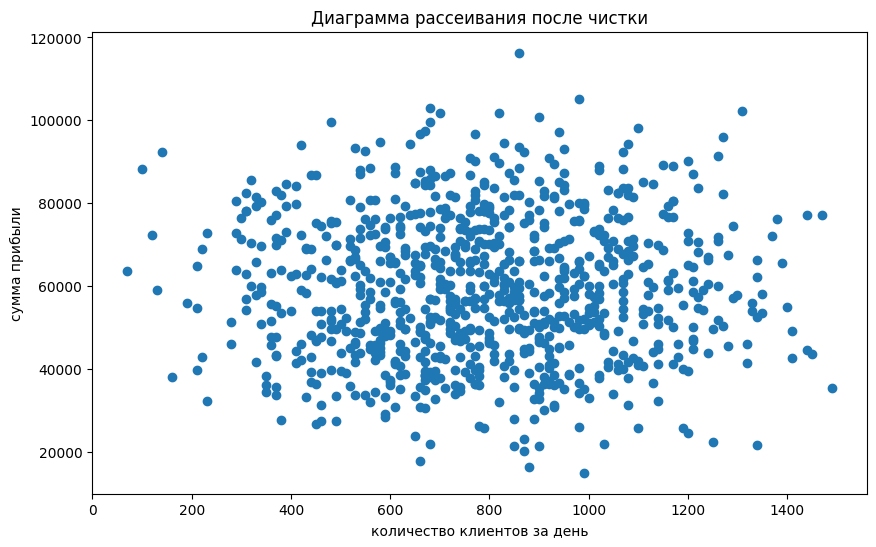

In [127]:
plt.figure(figsize=(10, 6))
plt.scatter(df_stores['Daily_Customer_Count'], df_stores['Store_Sales'])
plt.xlabel('Количество клиентов за день')
plt.ylabel('Сумма прибыли')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = df_stores["Daily_Customer_Count"].quantile(0.25)
Q3 = df_stores["Daily_Customer_Count"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (df_stores["Daily_Customer_Count"] < lower_bound) | (df_stores["Daily_Customer_Count"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(df_stores[outliers])

# Заменяем выбросы на медианные значения
median_score = df_stores["Daily_Customer_Count"].median()
df_stores.loc[outliers, "Daily_Customer_Count"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df_stores['Daily_Customer_Count'], df_stores['Store_Sales'])
plt.xlabel('количество клиентов за день')
plt.ylabel('сумма прибыли')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [128]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df_stores, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 537
Размер контрольной выборки: 179
Размер тестовой выборки: 180


Видим недостаток баланса

In [129]:
def check_balance(df_stores, name):
    counts = df_stores['Store_Sales'].value_counts()
    print(f"Распределение суммы продаж в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение суммы продаж в обучающей выборке:
Store_Sales
63540    3
69940    2
66050    2
41490    2
85670    2
        ..
43720    1
17670    1
66490    1
58670    1
62470    1
Name: count, Length: 508, dtype: int64

Распределение суммы продаж в контрольной выборке:
Store_Sales
54590    3
60060    2
74080    2
62380    2
39140    1
        ..
67640    1
72350    1
21750    1
55170    1
69130    1
Name: count, Length: 174, dtype: int64

Распределение суммы продаж в тестовой выборке:
Store_Sales
66000    2
59190    2
51480    2
76300    1
44890    1
        ..
65970    1
70050    1
90180    1
71280    1
81470    1
Name: count, Length: 177, dtype: int64



Применим андерсемплинг и оверсемплинг

In [130]:
def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'Store_Sales')
val_df_oversampled = oversample(val_df, 'Store_Sales')
test_df_oversampled = oversample(test_df, 'Store_Sales')

train_df_undersampled = undersample(train_df, 'Store_Sales')
val_df_undersampled = undersample(val_df, 'Store_Sales')
test_df_undersampled = undersample(test_df, 'Store_Sales')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение суммы продаж в обучающей выборке:
Store_Sales
44660    3
70810    3
62470    3
72320    3
66050    3
        ..
73710    3
67290    3
36290    3
49330    3
33010    3
Name: count, Length: 508, dtype: int64

Распределение суммы продаж в контрольной выборке:
Store_Sales
41080    3
39140    3
54590    3
39820    3
54820    3
        ..
67640    3
72350    3
21750    3
55170    3
69130    3
Name: count, Length: 174, dtype: int64

Распределение суммы продаж в тестовой выборке:
Store_Sales
61080    2
76300    2
44890    2
36280    2
45480    2
        ..
65970    2
70050    2
90180    2
71280    2
81470    2
Name: count, Length: 177, dtype: int64

Андерсэмплинг:
Распределение суммы продаж в обучающей выборке:
Store_Sales
105150    1
16370     1
17670     1
21300     1
21470     1
         ..
30610     1
30020     1
28330     1
27970     1
27840     1
Name: count, Length: 508, dtype: int64

Распределение суммы продаж в контрольной выборке:
Store_Sales
20270     1
2

https://www.kaggle.com/datasets/aravinii/house-price-prediction-treated-dataset - датасет имеет данные о домах и их ценах

In [131]:
df_houses = pd.read_csv(".//static//scv//df_test.csv")
print(df_houses.columns)

Index(['date', 'price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
       'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
       'has_lavatory', 'single_floor', 'month', 'quartile_zone'],
      dtype='object')


Столбцы на русском
date - дата
price - цена
bedrooms - количество спален
grade - оценка
has_basement - наличие подвала
living_in_m2 - размер в кв метрах
renovated - отремонтирован
nice_view - наличие хорошего вида
perfect_condition - идеальное состояние
real_bathrooms - количество ванн
has_lavatory - наличие туалета
single_floor - один этаж
month - месяц
quartile_zone - зона квартиля

In [132]:
df_houses.info()
df_houses.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6948 non-null   object 
 1   price              6948 non-null   float64
 2   bedrooms           6948 non-null   int64  
 3   grade              6948 non-null   int64  
 4   has_basement       6948 non-null   bool   
 5   living_in_m2       6948 non-null   float64
 6   renovated          6948 non-null   bool   
 7   nice_view          6948 non-null   bool   
 8   perfect_condition  6948 non-null   bool   
 9   real_bathrooms     6948 non-null   int64  
 10  has_lavatory       6948 non-null   bool   
 11  single_floor       6948 non-null   bool   
 12  month              6948 non-null   int64  
 13  quartile_zone      6948 non-null   int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 475.1+ KB


date     price  bedrooms  grade  has_basement  living_in_m2  \
0  2015-03-19  235000.0         3      7         False     121.70293   
1  2014-09-05  998000.0         4     10         False     350.24431   
2  2014-12-19  430000.0         1      7         False      58.52889   
3  2014-05-14  300000.0         3      6         False     117.05778   
4  2014-08-14  243500.0         3      6         False     196.02533   

   renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
0      False      False              False               1         False   
1      False      False              False               3          True   
2      False      False              False               1         False   
3      False      False              False               1         False   
4      False      False              False               3         False   

   single_floor  month  quartile_zone  
0          True      3              1  
1         False      9              1  
2          True     12              4  
3          True      5              3  
4          True      8              1

Объект наблюдения - недвижимость
Атрибуты - содержит набор информации об обучении, такие как:
Цена, дата, количествоо спален, оценка, наличие подвала, площадь, состояние восстановления и так далее

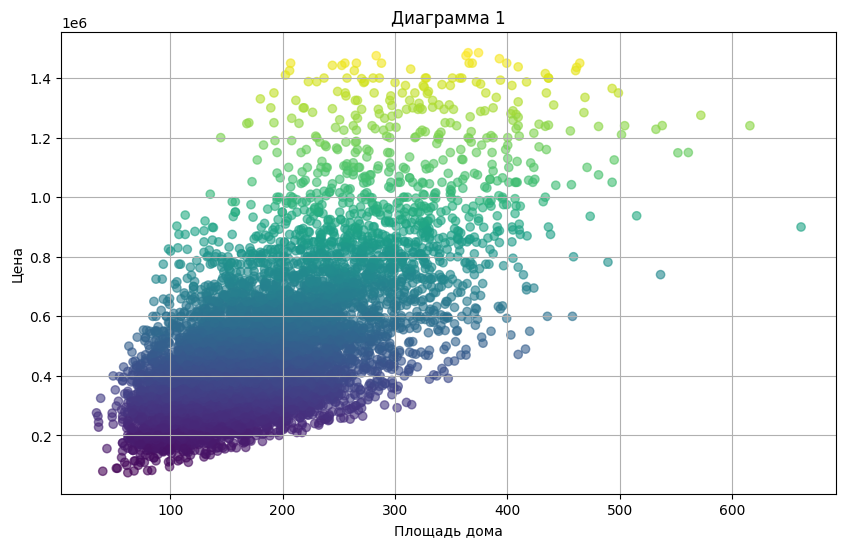

In [133]:
plt.figure(figsize=(10, 6))

plt.scatter(df_houses['living_in_m2'], df_houses['price'], c=df_houses['price'], alpha=0.6)

plt.title("Диаграмма 1")
plt.ylabel("Цена")
plt.xlabel("Площадь дома")
plt.grid(visible='true')

plt.show()

Присутствует связь между атрибутами: уровень цены зависит от всех атрибутов дома.
Для примера на графике приведена связь между ценой и площадью дома.
Примеры бизнес целей

    1.Прогнозирование рыночных тенденций.
    2.Увеличения доходов от продаж .
    
Эффект для бизнеса:  определение цен на объекты недвижимости, предсказание изменения цен на недвижимость.
Цели технического проекта

Для первой цели:

Вход: Площадь
Целевой признак: Цена

Для второй цели:

Вход: Дата и месяц
Целевой признак: Цена

Проверка на выбросы

In [134]:
null_values = df_houses.isnull().sum()
print("Пропущенные значения по столбцам:")
print(null_values)

stat_summary = df_houses.describe()
print("\nСтатистический обзор данных:")
print(stat_summary)

Пропущенные значения по столбцам:
date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

Статистический обзор данных:
              price     bedrooms        grade  living_in_m2  real_bathrooms  \
count  6.948000e+03  6948.000000  6948.000000   6948.000000     6948.000000   
mean   5.001805e+05     3.350461     7.580455    187.564084        1.723805   
std    2.464662e+05     0.886833     1.098832     76.220497        0.697007   
min    7.500000e+04     0.000000     3.000000     34.374110        0.000000   
25%    3.200000e+05     3.000000     7.000000    131.341616        1.000000   
50%    4.470000e+05     3.000000     7.000000    176.469248        2.000000   
75%    6.200000e+05     4.000000     8.000000   

На основе данных можно сделать вывод об отстутствии нулевых значений

In [136]:
for column in df_houses.select_dtypes(include=[np.number]).columns:
    skewness = df_houses[column].skew()
    print(f"\nКоэффициент асимметрии для столбца '{column}': {skewness}")

duplicates = df_houses.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")



Коэффициент асимметрии для столбца 'price': 1.2360372254399883

Коэффициент асимметрии для столбца 'bedrooms': 0.2707651264666999

Коэффициент асимметрии для столбца 'grade': 0.5399780033708754

Коэффициент асимметрии для столбца 'living_in_m2': 0.9231129090688741

Коэффициент асимметрии для столбца 'real_bathrooms': 0.6726357568802298

Коэффициент асимметрии для столбца 'month': 0.08293910123309992

Коэффициент асимметрии для столбца 'quartile_zone': 0.023363344136892138

Количество дубликатов: 0


Дупликаты отстутсвуют, выбросы незначительны

Устранение шумов

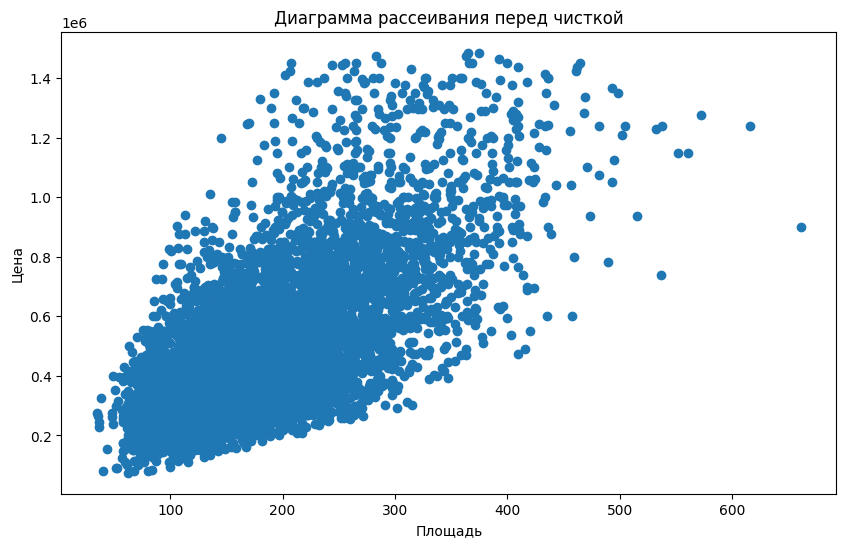

Выбросы в датасете:
            date      price  bedrooms  grade  has_basement  living_in_m2  \
142   2014-05-05   890000.0         4     10          True     410.63126   
166   2014-06-12  1240000.0         5     11         False     409.70223   
201   2014-09-23  1230000.0         5      9          True     407.84417   
209   2014-08-28  1275000.0         6     11          True     572.28248   
345   2014-12-23  1042000.0         4     10          True     457.08276   
...          ...        ...       ...    ...           ...           ...   
6777  2015-03-30  1436000.0         4     11          True     461.72791   
6795  2014-05-27  1149000.0         4     11          True     551.84382   
6809  2014-09-12  1040000.0         5     11          True     443.14731   
6905  2014-05-29  1425000.0         4     11          True     460.79888   
6931  2015-03-31   985000.0         5     10          True     431.99895   

      renovated  nice_view  perfect_condition  real_bathrooms  has_

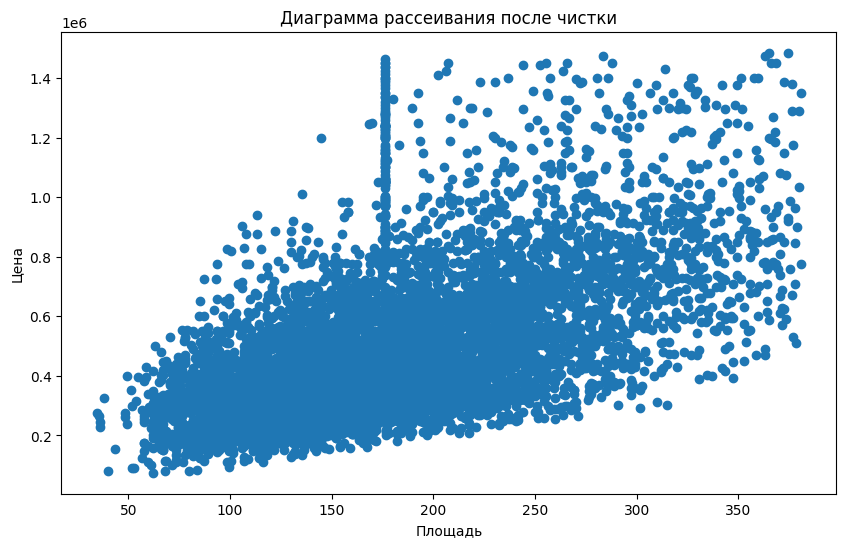

In [138]:
plt.figure(figsize=(10, 6))
plt.scatter(df_houses['living_in_m2'], df_houses['price'])
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Диаграмма рассеивания перед чисткой')
plt.show()

Q1 = df_houses["living_in_m2"].quantile(0.25)
Q3 = df_houses["living_in_m2"].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5 * IQR
lower_bound = Q1 - threshold
upper_bound = Q3 + threshold

outliers = (df_houses["living_in_m2"] < lower_bound) | (df_houses["living_in_m2"] > upper_bound)

# Вывод выбросов
print("Выбросы в датасете:")
print(df_houses[outliers])

# Заменяем выбросы на медианные значения
median_score = df_houses["living_in_m2"].median()
df_houses.loc[outliers, "living_in_m2"] = median_score

# Визуализация данных после обработки
plt.figure(figsize=(10, 6))
plt.scatter(df_houses['living_in_m2'], df_houses['price'])
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.title('Диаграмма рассеивания после чистки')
plt.show()

Разбиение набора данных на обучающую, контрольную и тестовую выборки

In [139]:
train_df, test_df = train_test_split(df_houses, test_size=0.2, random_state=42)

train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)

print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

Размер обучающей выборки: 4168
Размер контрольной выборки: 1390
Размер тестовой выборки: 1390


Видим недостаток баланса

In [141]:
def check_balance(df_houses, name):
    counts = df_houses['price'].value_counts()
    print(f"Распределение цены в {name}:")
    print(counts)
    print()

check_balance(train_df, "обучающей выборке")
check_balance(val_df, "контрольной выборке")
check_balance(test_df, "тестовой выборке")

Распределение цены в обучающей выборке:
price
450000.0     46
500000.0     40
375000.0     30
550000.0     30
300000.0     27
             ..
579950.0      1
1218000.0     1
374990.0      1
626000.0      1
1169000.0     1
Name: count, Length: 1463, dtype: int64

Распределение цены в контрольной выборке:
price
400000.0    16
450000.0    16
550000.0    14
600000.0    14
500000.0    13
            ..
744500.0     1
419950.0     1
369950.0     1
616000.0     1
220000.0     1
Name: count, Length: 710, dtype: int64

Распределение цены в тестовой выборке:
price
600000.0    15
550000.0    13
425000.0    13
250000.0    12
525000.0    12
            ..
607000.0     1
465250.0     1
359500.0     1
427500.0     1
442000.0     1
Name: count, Length: 718, dtype: int64



также используем oversampling и undersampling

In [142]:


def oversample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    oversampler = RandomOverSampler(random_state=42)
    x_resampled, y_resampled = oversampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1) 
    return resampled_df

def undersample(df, target_column):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    undersampler = RandomUnderSampler(random_state=42)
    x_resampled, y_resampled = undersampler.fit_resample(X, y) # type: ignore
    
    resampled_df = pd.concat([x_resampled, y_resampled], axis=1)
    return resampled_df

train_df_oversampled = oversample(train_df, 'price')
val_df_oversampled = oversample(val_df, 'price')
test_df_oversampled = oversample(test_df, 'price')

train_df_undersampled = undersample(train_df, 'price')
val_df_undersampled = undersample(val_df, 'price')
test_df_undersampled = undersample(test_df, 'price')

print("Оверсэмплинг:")
check_balance(train_df_oversampled, "обучающей выборке")
check_balance(val_df_oversampled, "контрольной выборке")
check_balance(test_df_oversampled, "тестовой выборке")

print("Андерсэмплинг:")
check_balance(train_df_undersampled, "обучающей выборке")
check_balance(val_df_undersampled, "контрольной выборке")
check_balance(test_df_undersampled, "тестовой выборке")

Оверсэмплинг:
Распределение цены в обучающей выборке:
price
626000.0     46
369000.0     46
650000.0     46
1169000.0    46
850000.0     46
             ..
735000.0     46
210500.0     46
265000.0     46
255000.0     46
369300.0     46
Name: count, Length: 1463, dtype: int64

Распределение цены в контрольной выборке:
price
863000.0    16
585000.0    16
560000.0    16
207000.0    16
267000.0    16
            ..
510000.0    16
260000.0    16
550000.0    16
185000.0    16
435000.0    16
Name: count, Length: 710, dtype: int64

Распределение цены в тестовой выборке:
price
331292.0    15
950000.0    15
519000.0    15
240000.0    15
193000.0    15
            ..
250000.0    15
420000.0    15
870000.0    15
242000.0    15
470000.0    15
Name: count, Length: 718, dtype: int64

Андерсэмплинг:
Распределение цены в обучающей выборке:
price
1485000.0    1
80000.0      1
81000.0      1
82000.0      1
83000.0      1
            ..
125000.0     1
118125.0     1
115000.0     1
110000.0     1
100000.0 